In [17]:
# подгрузка библиотек/классов для обработки данных и machine learning
import pandas as pd  
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
# подгрузка бибиотек визуализации
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [27]:
# подгрузка метрик
from sklearn.metrics import confusion_matrix

In [6]:
# загружаем данные через pandas-метод 'read_формат'
my_stat = pd.read_csv('C:\\Users\\Uldum\\Downloads\\train_data_tree.csv')
# test_dat = pd.read_json('C:\\Users\\Uldum\\Downloads\\dataset_209691_15.txt')

In [26]:
# проверяем отсутствие незаполненных ячеек и работаем с ними
my_stat.isnull().values.any()
# test_dat.isnull().values.any()
# проверяем отсутствие незаполненных данных по колонкам
my_stat.isna().any()
# находит число несполненных ячеек по столбцам
my_stat.isna().sum()
# заполняем нужные колонки датафрейма значением value с помощью метода fillna
# my_stat[['sex', 'exang']] = my_stat[['sex','exang']].fillna(value=0)

sex      0
exang    0
num      0
dtype: int64

In [8]:
# выводим данные, для первичной оценки
my_stat.head(5)

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [9]:
# сплитим данные pfndas/python методами на X - все признаки, независимые переменне и y - зависимая переменная, которую предсказываем
X = my_stat.drop(columns = 'num')
y = my_stat['num']
# X_test = test_dat.drop(columns = 'species')
# y_test = test_dat.species

In [10]:
# проверяем, что данные разсплитились как нам нужно, выводя X и/или y
X.head(5)

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [ ]:
# создание вспомогательного дата-фрэйма, если нужно сохранять промежуточые результаты валидации
# scores = pd.DataFrame()
# scores

In [14]:
# ветка с использованием GridSearchCV кросвалидаци по лучшим параметрам
# Инициализация Дерева
dt = DecisionTreeClassifier()
# Словарь параметров для Дерева и их диапазоном значений
dt_params = {'max_depth': [1, 10], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 10]}
# Обучение Дерева с перебором значений параметров
search = GridSearchCV(dt, param_grid=dt_params, cv=5)
search.fit(X, y)
# Дерево с лучшим сочетаением параметров
best_tree = search.best_estimator_
# вывод лучшиего дерева
search.best_estimator_
# вывод лучших параметров для дерева
search.best_params_
# предсказания с лучшим сочетанием параметров через метод predict() на тестовых данных-признаках testX
# predictions = best_tree.predict(testX)
# постройка confusion-matrix на основе истинных значений (использованных в обучении) и предсказанных (использованных в predict)
# conf_matrix = confusion_matrix(y, predictions)

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [21]:
# ветка с использованием рандомного подбора параметров RandomizedSearchCV (снижение времени обучения)
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [1, 10], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 10]}
search = RandomizedSearchCV(dt, dt_params, n_iter = 8)
search.fit(X, y)
best_tree = search.best_estimator_
search.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 1}

In [12]:
# классом sk.learn сплитим данные X, y на обучающие (обучаем на них дерево) и проверочные (проверяем на них точность предсказания обученного дерева) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# создаём экземпляр класса дерева и фитим его тренировочными данными, задав параметры. Результат - обученное дерево.
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
# проверяем точность предсказания дерева на тестовых данных с помощью метода
clf.score(X_test, y_test)

0.759493670886076

In [32]:
# предсказываем (если требуется) на основе тестовых данных признаков целевую переменную.
clf.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

[Text(0.5, 0.75, 'X[1] <= 0.5\ngini = 0.497\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.25, 'gini = 0.434\nsamples = 157\nvalue = [107, 50]'),
 Text(0.75, 0.25, 'gini = 0.384\nsamples = 81\nvalue = [21, 60]')]

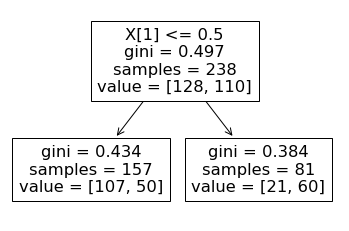

In [22]:
# рисуем дерево методом
tree.plot_tree(best_tree)

In [31]:
# считаем information gain для переменной в корне дерева (IG = E - (n0*E0 + n1*E1)/N). Чем больше - тем переменная больше коррелирует.
# E - энтропия в корне дерева, n0 - чило сэмплов слева, n1 - число сэмплов справа, E0 - энтропия слева, Е1 - энтропия справа. N = n0+n1)
inf_gain = 0.996 - (0.903*157 + 0.826*81)/(157 + 81)
inf_gain

0.11920588235294105

In [161]:
# автоподсчёт собачек в предсказанном массиве из какого-то задания
dogs = [*clf.predict(test_dat)].count('собачка')
print(dogs)

55


In [105]:
# rs = np.random.seed(0)

In [106]:
# for i in range(1, 100):
#     my_awesome_tree = RandomForestClassifier(criterion = 'entropy', max_depth=i, random_state=rs)
#     my_awesome_tree.fit(X, y)
#     train_score = my_awesome_tree.score(X, y)
#     test_score = my_awesome_tree.score(X_test, y_test)

#     temp_scores = pd.DataFrame({
#         'max_depth': [i],
#         'train_score': [train_score],
#         'test_score': [test_score]})
#     scores = pd.concat([scores, temp_scores])

In [126]:
# scores

In [128]:
# score_data_long=pd.melt(scores, id_vars=['max_depth'], value_vars=['train_score','test_score'],
#                         var_name='set_type', value_name='score' )

# plt.figure(figsize=(30, 10)) #просто размер нормальный делаем 
# sns.lineplot(x='max_depth',y='score', hue='set_type', data=score_data_long)